In [34]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
from lib.arch.vqvae_2d import get_model
from lib.dataset.npz_dataset import norm_fn
from ruamel.yaml import YAML
import argparse
import torch
import numpy as np
from ryu_pytools import plot_some, arr_info, tensor_to_ndarr

In [35]:
def read_cfg(path):
    args = argparse.Namespace()
    with open(path, 'r') as f:
        yaml = YAML(typ='safe', pure=True)
        yml = yaml.load(f)
    cmd = [c[1:] for c in sys.argv if c[0]=='-']
    for k,v in yml.items():
        if k not in cmd:
            args.__dict__[k] = v
    return args

In [36]:
cfg_path = '../config/vqvae_2d.yaml'
ckpt_path = '../out/weights/vqvae_2d/Epoch_1000.pth'
data_path = '/home/ryuuyou/E5/project/data/CARE/Isotropic_Liver/train_data/data_label.npz'
device = torch.device('cuda:0')

In [37]:
args = read_cfg(cfg_path)
model = get_model(args).to(device)
ckpt = torch.load(ckpt_path, weights_only=False)
model.load_state_dict({k.replace('module.',''):v for k,v in ckpt['model'].items()})
model.eval()
print('Model loaded')

Model loaded


In [38]:
file = np.load(data_path)
data = file['X']

[ 291 2098  667  898 2495]
[Array]:
shape: torch.Size([5, 1, 128, 128])
dtype: torch.float32
max: 1.0
min: 0.0
mean: 0.2213236391544342
std: 0.11676708608865738
sum: 18130.83203125
device: cuda:0


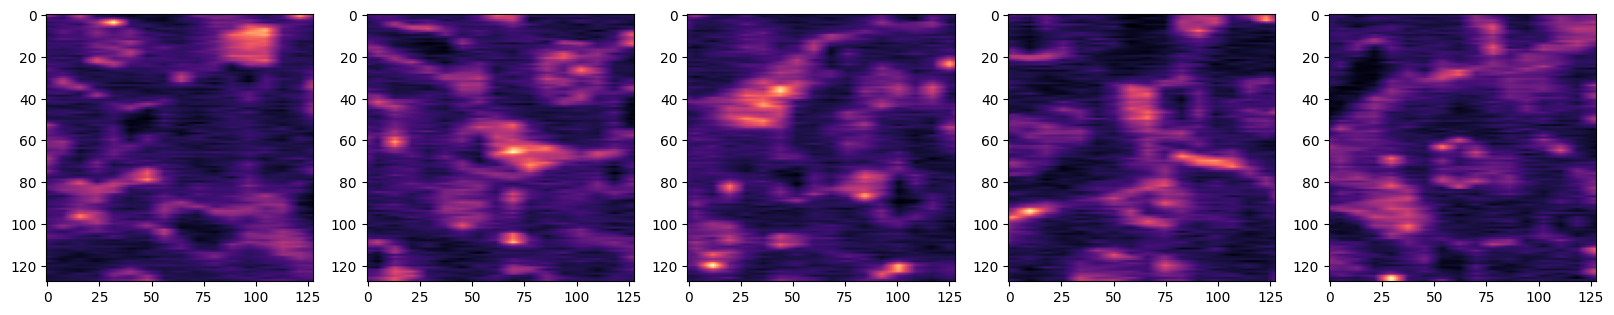

In [39]:
size = 5
index = np.random.randint(0, data.shape[0], size)
print(index)
img = data[index]
plot_some(img, figsize=(20,5))
for i in range(len(img)):
    img[i] = norm_fn('min_max')(img[i])
img = torch.from_numpy(img).float().to(device)
arr_info(img)


In [40]:
z_e, z_q, z_rec = model(img)

[Array]:
shape: torch.Size([5, 1, 128, 128])
dtype: torch.float32
max: 0.8915042281150818
min: 0.03905113786458969
mean: 0.21847067773342133
std: 0.10935728251934052
sum: 17897.1171875
device: cuda:0


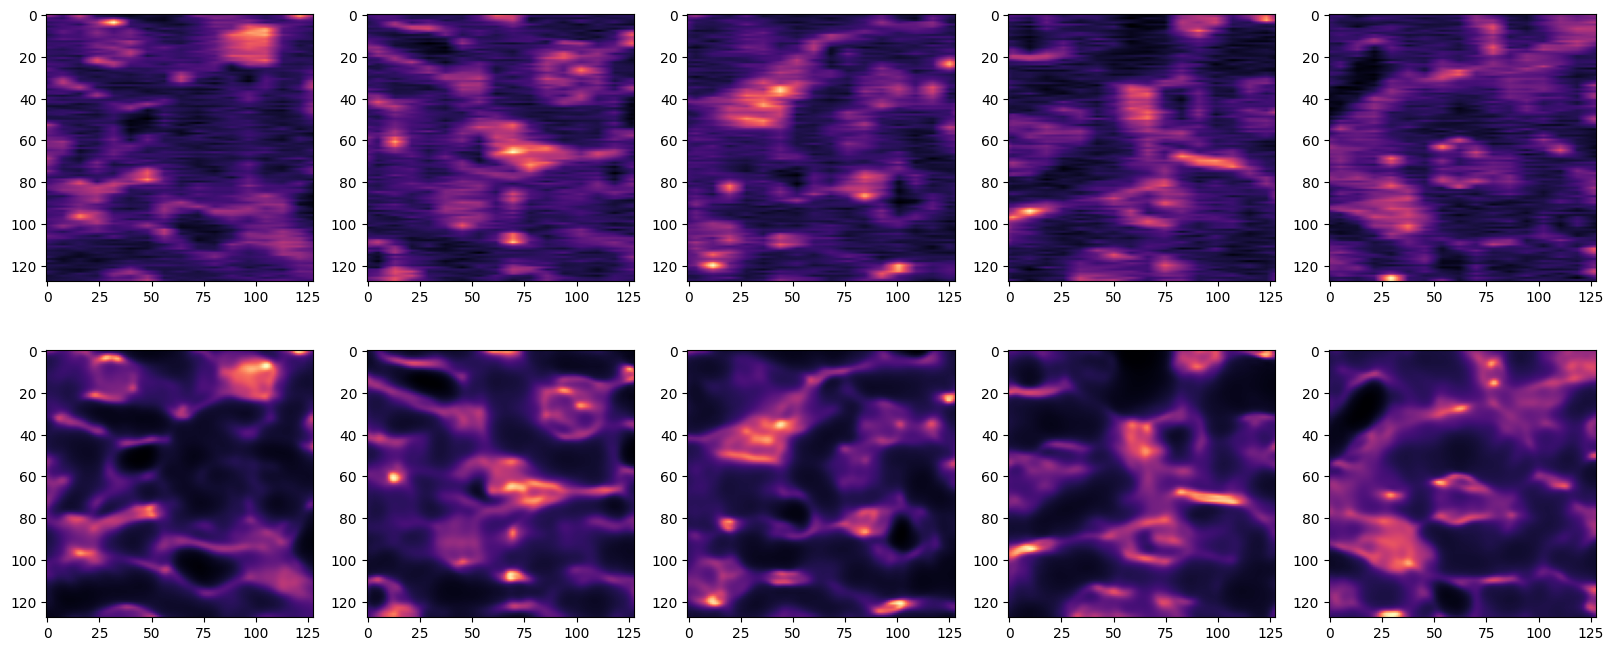

In [41]:
arr_info(z_rec)
plot_some(tensor_to_ndarr(img), tensor_to_ndarr(z_rec), figsize=(20,8))

In [42]:
arr_info(z_e)
arr_info(z_q)

[Array]:
shape: torch.Size([5, 256, 16, 16])
dtype: torch.float32
max: 0.8185222744941711
min: -0.8155767321586609
mean: 0.0007709451601840556
std: 0.12522254884243011
sum: 252.62330627441406
device: cuda:0
[Array]:
shape: torch.Size([5, 256, 16, 16])
dtype: torch.float32
max: 0.7981155514717102
min: -0.7983676791191101
mean: 0.0006469559739343822
std: 0.12451434880495071
sum: 211.99453735351562
device: cuda:0


[Array]:
shape: torch.Size([5, 16, 16])
dtype: torch.float32
max: 0.22809654474258423
min: -0.0961906909942627
mean: -0.0012564350618049502
std: 0.05434026941657066
sum: -1.6082369089126587
device: cuda:0


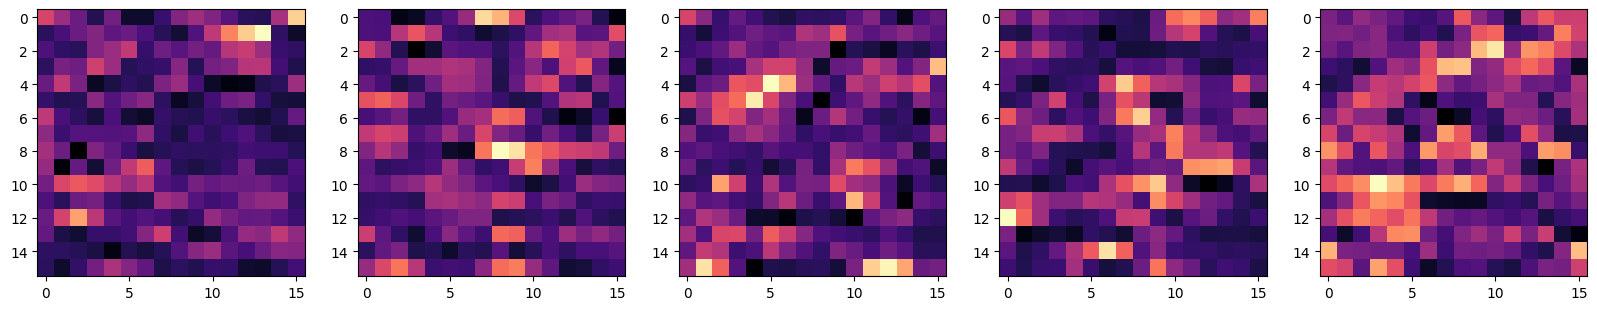

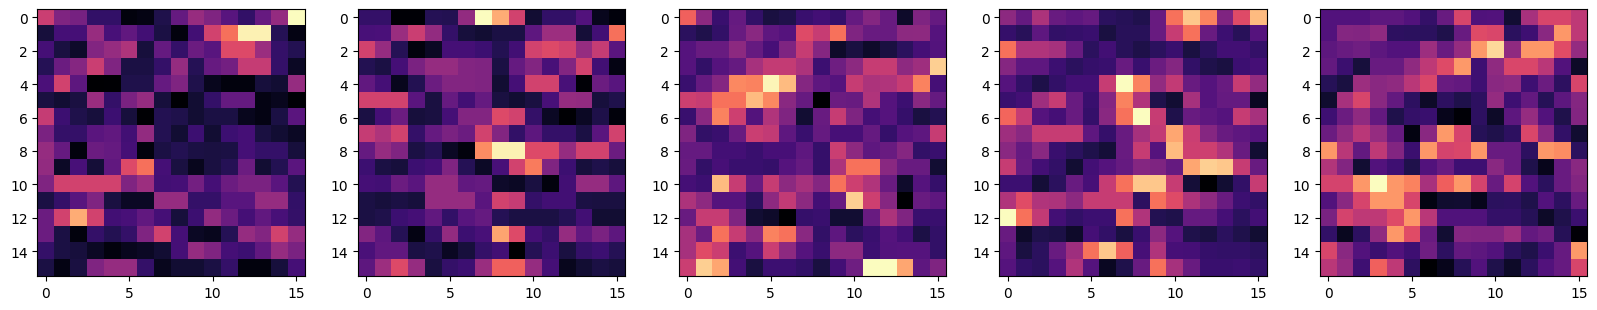

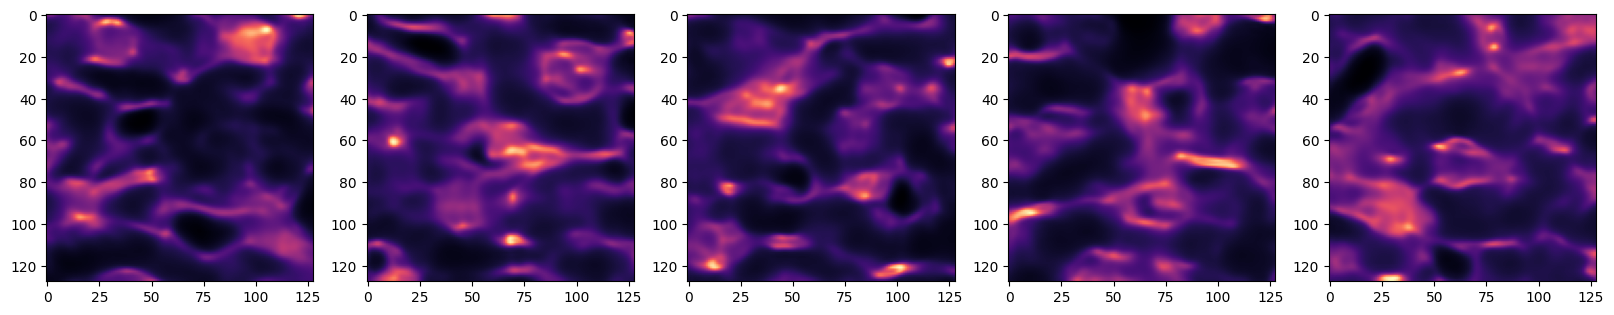

In [43]:
arr_info(z_q[:, 0])
plot_some(tensor_to_ndarr(z_e[:, 0:1]), figsize=(20,5))
plot_some(tensor_to_ndarr(z_q[:, 0:1]), figsize=(20,5))
plot_some(tensor_to_ndarr(z_rec), figsize=(20,5))